# 1. Sample Data and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

# 2. Hierarchical Clustering
Hierarchical Clustering은 `sklearn.cluster` 의 `AgglomerativeClustering` 를 이용
강의에서 배운 연결 법들은 4가지
1. 최단 연결법
2. 최장 연결법
3. 평균 연결법
4. 중심 연결법
이를 적용하기 위해서는 `linkage` argument를 통해서 가능
- average
    - 평균 연결법
- complete
    - 최장 연결법
- single
    - 최단 연결법
- ward
    - 중심 연결법
   
기본 값은 `ward` 

### 2.1 Learning

In [3]:
# 최단연결법
from sklearn.cluster import AgglomerativeClustering


single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="single")

single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

### 2.2 Dendrogram

In [4]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])

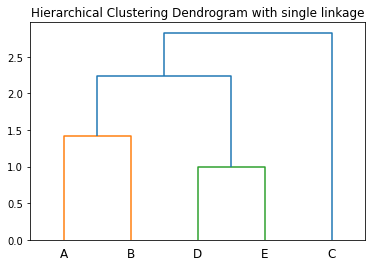

In [5]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode='level', p=3)
plt.show()

### 2.3 Multiple Clusters
위에서 사용한 argument들은 데이터 전부를 묶는 방식의 Clustering  
이제 n 개의 clustering으로 생성

#### 2.3.1 Two Clusters

In [6]:
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage="single")

single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [7]:
single_cluster_2.labels_

array([0, 0, 1, 0, 0], dtype=int64)

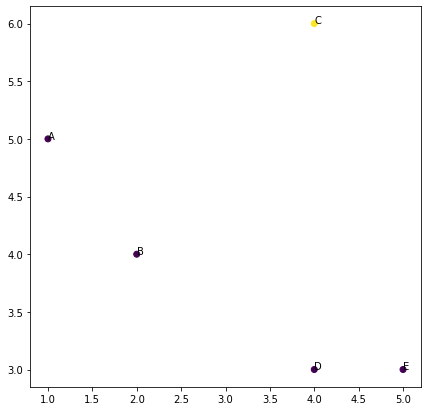

In [8]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

#### 2.3.2 Three Clusters

In [9]:
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage="single")

single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [10]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2], dtype=int64)

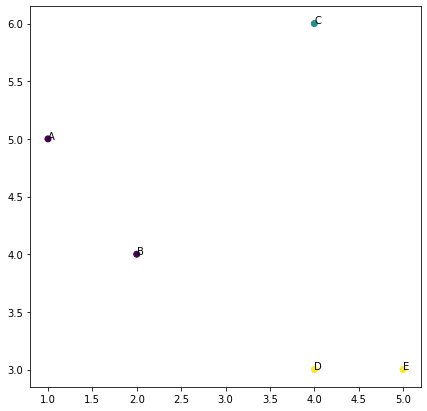

In [11]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

# 3. Different connection methods

### 3.1 Mean method of connection

In [12]:
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="average")

avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

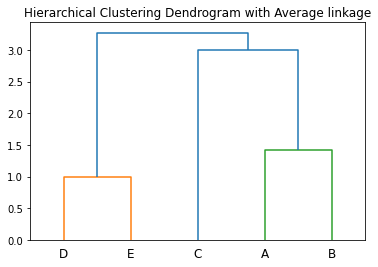

In [13]:
plt.title('Hierarchical Clustering Dendrogram with Average linkage')
plot_dendrogram(avg_cluster, truncate_mode='level', p=3)
plt.show()

### 3.2 Longest connection method

In [14]:
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="complete")

max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

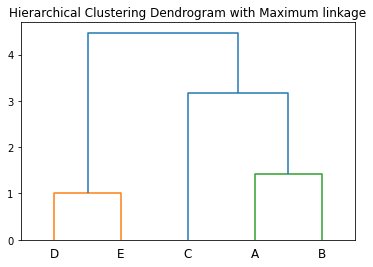

In [15]:
plt.title('Hierarchical Clustering Dendrogram with Maximum linkage')
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

### 3.3 Center connection method

In [16]:
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="ward")

centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

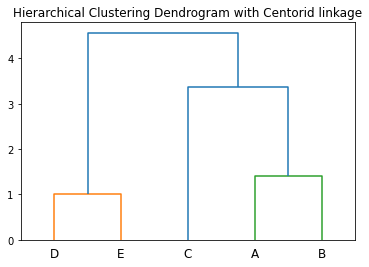

In [17]:
plt.title('Hierarchical Clustering Dendrogram with Centorid linkage')
plot_dendrogram(centroid_cluster, truncate_mode='level', p=3)
plt.show()

# 4. Total

In [18]:
clusters = [
    ("Single", single_cluster),
    ("Average", avg_cluster),
    ("Maximum", max_cluster),
    ("Centroid", centroid_cluster),
]

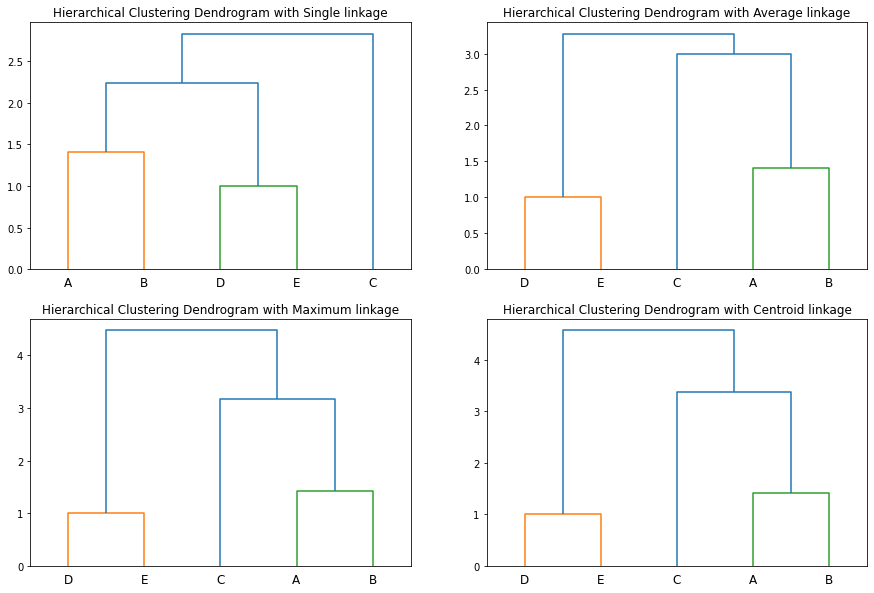

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
    ax = axes[idx//2, idx%2]
    ax.set_title(f'Hierarchical Clustering Dendrogram with {name} linkage')
    plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)

# 5. Summary

> Clustering(군집화)
- 유사한 속성을 갖는 데이터를 묶어 전체 데이터를 몇 개 군집으로 나누는 것
- 소속 집단의 정보를 모르고 있는 상태
- Label이 없는 데이터를 나누는 방법

> 군집분석 종류
- 계층적 군집화
- 비계층적 군집화

> 계층적 군집화
- 개체들을 가까운 집단부터 묶어 나가는 방식
- 유사 개체들이 결합되는 dendrogram 생성
- Cluster들은 sub-cluster를 갖고 있음

>> 군집화 거리 종류
1. 유클리드 거리
2. 맨해튼 거리
3. 표준화 거리
4. 민콥스키 거리

>> 계층 군집화 종류
1. 최단 연결법 : 군집에서 가장 가까운 데이터가 새로운 거리가 된다
2. 최장 연결법 : 군집에서 가장 먼 데이터가 군집과 데이터의 거리가 된다
3. 평균 연결법 : 군집의 데이터들 간의 거리의 평균이 군집과 데이터의 거리가 된다
4. 중심 연결법 : 군집의 중심이 새로운 거리가 된다

>> 좋은 클러스팅이란
- 군집 내 유사도를 최대화(거리를 최소화)
- 군집 간 유사도를 최소화(거리를 최대화)

>> 클러스터링 평가
- 내부 평가 : 군집된 결과 그 자체를 놓고 평가
	- Dunn Index : 군집과 군집 사이 거리가 클수록, 군집 내 데이터 간 거리가 작을 수록 좋은 모델 -> DI가 큰모델
	- 실루엣(Silhouette) : 군집을 만든 결과가 얼마나 유용한지 따지는 군집타당성지표
- 외부 평가 : 군집화에 사용되지 않은 데이터로 평가

> 비계층적 군집화
- 전체 데이터를 확인하고 특정 기준으로 데이터 동시 구분
- 각 데이터를 사전에 정의된 개수의 군집 중 하나에 속하게 된다

>> 비계층적 군집화 중류
- K-Means
	- 정의
		- 주어진 데이터를 K개의 군집으로 묶는 방법
		- 각 군집은 하나의 중심을 가지며 각 데이터는 가장 가까운 중심에 할당
		- 같은 중심에 할당된 개체들이 모여 하나의 ㄱ누집 형성, 사전에 군집의 수, K가 정해져야함
	- 방법
		1. 데이터 중 임의로 K개의 중심점 설정
		2. 모든 데이터에서 설정된 각 군집의 중심점까지의 거리 계산
		3. 모든 데이터를 가장 가까운 중심점이 속한 군집으로 할당
		4. 각 군집의 중심점 재설정
		5. 군집의 중심점이 변경되지 않을 때까지 2~5를 반복
	- 초기 중심점 설정
		- K-Means의 성능은 초기 중심점의 위치에 크게 좌우
		- 무작위로 초기 중심 설정되는 위협 방지위한 다양한 방법
			1. 반복적 수행하여 가장 많이 나타나는 군집 사용 방법
			2. 전체 데이터 중 일부만 추출하여 계층적 군집화 수행한 뒤 초기 군집 중심 설정 방법
			3. 데이터 분포의 정보를 사용하여 초기 중심 설정
	- 장점
		- 적용하기 쉽다
		- 새로운 데이터에 대한 군집 계산할 때 각 군집의 중심점과의 거리만 계산하면 되므로 빠르다
	- 단점
		- 서로 다른 크기의 군집을 잘 못찾음
		- 서로 다른 밀도의 군집을 잘 못찾음
		- 지역적 패턴이 존재하는 군집을 잘 못찾음
- DB Scan
	- 정의
		- 점 P에서부터 거리가 e(epsilon) 내 m(minPts)개 이상 있으면 하나의 군집으로 인식
	- 학습방법
		1. Core Points : 거리 eps이내에 데이터가(자신포함) minPts개 이상 있는 포인트
		2. Border Points : Core Points를 이웃으로 갖고 있지만 eps 이내 데이터가 minPts개 보다 적은 포인트
		3. Noise Points : Core Points를 이웃으로 갖고 있지 않고 eps 이내 데이터가 minPts개 보다 적은 포인트
	- DBSCAN 모수
		1. minPts
			- 최적의 minPts를 구하는 방법에 대해서는 알려진 방법이 없음
			- Corss Validation등의 방법으루 구해야 함
		2. eps
			- 주어진 minPts에 대한 최적 거리 구하는 방법에 대해선 K-Dist Graph 사용
			- K-Dist Graph : minPts번째 인접한 이웃 데이터 포인트까지의 거리, 급격히 증가하기 직전의 지점을 eps로 설정
	- 장점
		- 지역적 패턴이 잇는 데이터의 군집 찾을 수 있다
		- 노이즈 데이터를 따로 분류하여 노이즈 데이터들이 군집에 영향을 주지 않음
	- 단점
		- 밀도가 구역에 따라 바뀔 경우 파악하지 못함